The __Official__ Colab Demo for ICCV'21 paper

__[Dressing in Order: Recurrent Person Image Generation for Pose Transfer, Virtual Try-on and Outfit Editing](https://arxiv.org/abs/2104.07021)__


\[[Code](https://github.com/cuiaiyu/dressing-in-order)\]
\[[Paper](https://arxiv.org/abs/2104.07021)\]

# Read Before Starting
- This Colab Demo is available for __non-commercial research purposes__ only.
- This Colab contains data downloading scripts. __*Please make sure you are legally allowed to use the [DeepFahsion-MultiModal dataset](https://github.com/yumingj/DeepFashion-MultiModal) as required by [their license]() before trying this demo.*__


# Step 0: Install Environment
(This demo only supports inference, so we don't install GFLA.)

In [ ]:
# check GPU
# If you don't have GPU, please set it by Runtime -> Change runtime type
!nvidia-smi

Tue Apr 18 03:20:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# install DiOr
import os
!git clone https://github.com/cuiaiyu/dressing-in-order
repo_name='dressing-in-order'
os.chdir(f'./{repo_name}')

Cloning into 'dressing-in-order'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 209 (delta 86), reused 193 (delta 81), pack-reused 0
Receiving objects: 100% (209/209), 5.13 MiB | 15.51 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [10]:
ls

LICENSE           datasets/         options/          train.py
README.md         demo.ipynb        requirements.txt  utils/
cover_images/     generate_all.py   scripts/
data/             models/           tools/


In [18]:
import os
repo_name='dressing-in-order'
os.chdir(f'./{repo_name}')

In [3]:
!pip install scikit-image
!pip install tensorboardX

  Obtaining dependency information for numpy>=1.17.0 from https://files.pythonhosted.org/packages/9a/cd/d5b0402b801c8a8b56b04c1e85c6165efab298d2f0ab741c2406516ede3a/numpy-1.24.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata
Using cached numpy-1.24.4-cp39-cp39-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
aim 3.17.5 requires SQLAlchemy<2,>=1.4.1, but you have sqlalchemy 2.0.23 which is incompatible.
bentoml 1.0.21 requires opentelemetry-api==1.17.0, but you have opentelemetry-api 1.20.0 which is incompatible.
bentoml 1.0.21 requires opentelemetry-instrumentation==0.38b0, but you have opentelemetry-instrumentation 0.40b

# Step 1: Download Data
This Data is from [DeepFashion-Multimodal](https://arxiv.org/abs/2205.15996) [1].

Please make sure you read [the dataset license](https://github.com/yumingj/DeepFashion-MultiModal/blob/main/LICENSE) before running the below code.

You are __responsible__ to make sure whether the data is available for your usage.

```[1] Jiang, Yuming, et al. "Text2human: Text-driven controllable human image generation." ACM Transactions on Graphics (TOG) 41.4 (2022): 1-11.```



In [7]:
import os
from tqdm.notebook import tqdm

def download_from_gdrive(dst_root, fn, gdrive_path, iszip=True):
  if not os.path.exists(dst_root):
    os.system("mkdir {}".format(dst_root))
  if not os.path.exists("{}/{}".format(dst_root, fn)):
    os.system("gdown {}".format(gdrive_path))
    if iszip:
      os.system("unzip {}.zip".format(fn))
      os.system("rm {}.zip".format(fn))
    os.system("mv {} {}/".format(fn, dst_root))
  print("download {}.".format(fn))


In [4]:
# download data from https://github.com/yumingj/DeepFashion-MultiModal
import os
from tqdm.notebook import tqdm

if not os.path.exists("data/"):
  os.system("mkdir data")

def download_from_gdrive(dst_root, fn, gdrive_path, iszip=True):
  if not os.path.exists(dst_root):
    os.system("mkdir {}".format(dst_root))
  if not os.path.exists("{}/{}".format(dst_root, fn)):
    os.system("gdown {}".format(gdrive_path))
    if iszip:
      os.system("unzip {}.zip".format(fn))
      os.system("rm {}.zip".format(fn))
    os.system("mv {} {}/".format(fn, dst_root))
  print("download {}.".format(fn))

# download data
download_from_gdrive("data", "testM_lip", "1toeQwAe57LNPTy9EWGG0u1XfTI7qv6b1")
download_from_gdrive("data", "images", "1U2PljA7NE57jcSSzPs21ZurdIPXdYZtN")
download_from_gdrive("data","fasion-pairs-test.csv","12fZKGf0kIu5OX3mjC-C3tptxrD8sxm7x",iszip=False)
download_from_gdrive("data","fasion-annotation-test.csv","1MxkVFFtNsWFshQp_TA7qwIGEUEUIpYdS",iszip=False)
download_from_gdrive("data","standard_test_anns.txt","19nJSHrQuoJZ-6cSl3WEYlhQv6ZsAYG-X",iszip=False)



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1toeQwAe57LNPTy9EWGG0u1XfTI7qv6b1 

unzip:  cannot find or open testM_lip.zip, testM_lip.zip.zip or testM_lip.zip.ZIP.
rm: testM_lip.zip: No such file or directory
mv: rename testM_lip to data/testM_lip: No such file or directory


Access denied with the following error:
download testM_lip.



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1U2PljA7NE57jcSSzPs21ZurdIPXdYZtN 

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.
rm: images.zip: No such file or directory
mv: rename images to data/images: No such file or directory


Access denied with the following error:
download images.


Downloading...
From: https://drive.google.com/uc?id=12fZKGf0kIu5OX3mjC-C3tptxrD8sxm7x
To: /Users/sangtnguyen/Coding/Personal/freel/try-on/dressing-in-order/fasion-pairs-test.csv
100%|██████████| 844k/844k [00:00<00:00, 6.18MB/s]


download fasion-pairs-test.csv.


Downloading...
From: https://drive.google.com/uc?id=1MxkVFFtNsWFshQp_TA7qwIGEUEUIpYdS
To: /Users/sangtnguyen/Coding/Personal/freel/try-on/dressing-in-order/fasion-annotation-test.csv
100%|██████████| 812k/812k [00:00<00:00, 5.91MB/s]


download fasion-annotation-test.csv.
download standard_test_anns.txt.


Downloading...
From: https://drive.google.com/uc?id=19nJSHrQuoJZ-6cSl3WEYlhQv6ZsAYG-X
To: /Users/sangtnguyen/Coding/Personal/freel/try-on/dressing-in-order/standard_test_anns.txt
100%|██████████| 2.80k/2.80k [00:00<00:00, 4.27MB/s]


FileNotFoundError: [Errno 2] No such file or directory: 'data/testM_lip'

In [51]:
cd dressing_in_order/

/Users/sangtnguyen/Coding/Personal/freel/try-on/backend/dressing_in_order


In [66]:
target_fns = [fn[:-4] for fn in os.listdir("data/images")]

In [67]:
len(target_fns)

40658

In [76]:
test_img = os.listdir("data/test")

In [79]:
from random import choices

In [83]:
results = []

In [84]:
for key in ds.attr_keys:
	for i in range(10):
		img = choices(test_img)
		results.append(f"{key}, {img[0]}")

In [86]:
for i in results:
    print(i)

plaid, fashionWOMENTees_Tanksid0000180110_2side.jpg
plaid, fashionWOMENTees_Tanksid0000028801_7additional.jpg
plaid, fashionWOMENBlouses_Shirtsid0000539304_4full.jpg
plaid, fashionMENShirts_Polosid0000541703_7additional.jpg
plaid, fashionWOMENDressesid0000632302_2side.jpg
plaid, fashionWOMENPantsid0000218301_1front.jpg
plaid, fashionWOMENTees_Tanksid0000254004_2side.jpg
plaid, fashionWOMENSweatersid0000224202_3back.jpg
plaid, fashionWOMENTees_Tanksid0000184804_2side.jpg
plaid, fashionWOMENBlouses_Shirtsid0000121501_2side.jpg
plain, fashionWOMENBlouses_Shirtsid0000625603_7additional.jpg
plain, fashionMENTees_Tanksid0000016602_2side.jpg
plain, fashionWOMENPantsid0000140503_1front.jpg
plain, fashionWOMENDressesid0000392001_1front.jpg
plain, fashionMENShirts_Polosid0000451401_3back.jpg
plain, fashionWOMENBlouses_Shirtsid0000660605_7additional.jpg
plain, fashionMENTees_Tanksid0000595506_1front.jpg
plain, fashionMENShortsid0000489001_7additional.jpg
plain, fashionWOMENJackets_Coatsid00001347

In [ ]:
for i in 

In [5]:

# filter images (exclude training data and rename the files)
if not os.path.exists("data/test"):
  os.mkdir("data/test")
target_fns = [fn[:-4] for fn in os.listdir("data/testM_lip")]
for fn in tqdm(os.listdir("data/images")):
  elements = fn.split("-")
  elements[2] = elements[2].replace("_","")
  last_elements = elements[-1].split("_")
  elements[-1] = last_elements[0] + "_" + last_elements[1] + last_elements[2]
  new_fn = "fashion"+"".join(elements)

  if new_fn[:-4] in target_fns:
    os.system("mv {} {}".format("data/images/"+fn, "data/test/"+new_fn))



FileNotFoundError: [Errno 2] No such file or directory: 'data/testM_lip'

# Step 2: Load Pre-trained Model

In [5]:
ls

__pycache__/               dress_in_order_demo.ipynb
app.py                     sample.png
backend/                   style.css
components.py


In [4]:
cd  backend/dressing-in-order

[Errno 2] No such file or directory: 'backend/dressing-in-order'
/Users/sangtnguyen/Coding/Personal/freel/try-on


In [8]:
import torch
from backend.dressing_in_order.models.dior_model import DIORModel
import os, json
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataroot = 'backend/dressing_in_order/data'
exp_name = 'DIORv1_64' # DIOR_64
epoch = 'latest'
netG = 'diorv1' # dior
ngf = 64

## this is a dummy "argparse"
class Opt:
    def __init__(self):
        pass
if True:
    opt = Opt()
    opt.dataroot = dataroot
    opt.isTrain = False
    opt.phase = 'test'
    opt.n_human_parts = 8; opt.n_kpts = 18; opt.style_nc = 64
    opt.n_style_blocks = 4; opt.netG = netG; opt.netE = 'adgan'
    opt.ngf = ngf
    opt.norm_type = 'instance'; opt.relu_type = 'leakyrelu'
    opt.init_type = 'orthogonal'; opt.init_gain = 0.02; opt.gpu_ids = [0]
    opt.frozen_flownet = True; opt.random_rate = 1; opt.perturb = False; opt.warmup=False
    opt.name = exp_name
    opt.vgg_path = ''; opt.flownet_path = ''
    opt.checkpoints_dir = 'backend/dressing_in_order/checkpoints'
    opt.frozen_enc = True
    opt.load_iter = 0
    opt.epoch = epoch
    opt.verbose = False
    opt.gpu_ids = None

# create model
#os.mkdir("checkpoints")
# download_from_gdrive("checkpoints", "DIORv1_64", "1MyHq-P0c8zz7ey7p_HTTZKeMie5ZuNlb")

model = DIORModel(opt)
model.setup(opt)


load vgg ckpt from torchvision dict.
[init] init pre-trained model vgg.
initialize network with orthogonal
initialize network with orthogonal
initialize network with kaiming
initialize network with orthogonal
[init] frozen net netVGG.
[init] frozen net netFlow.
[init] frozen net netE_attr.
[init] frozen net netE_attr.
loading the model from backend/dressing_in_order/checkpoints/DIORv1_64/latest_net_E_attr.pth
loading the model from backend/dressing_in_order/checkpoints/DIORv1_64/latest_net_G.pth
not exsits backend/dressing_in_order/checkpoints/DIORv1_64/latest_net_VGG.pth
loading the model from backend/dressing_in_order/checkpoints/DIORv1_64/latest_net_Flow.pth
---------- Networks initialized -------------
[Network E_attr] Total number of parameters : 1.191 M
[Network G] Total number of parameters : 16.501 M
[Network VGG] Total number of parameters : 0.113 M
[Network Flow] Total number of parameters : 6.608 M
-----------------------------------------------
[tensorboard] init tensorboar

-1

In [44]:
# load data
from backend.dressing_in_order.datasets_.deepfashion_datasets import DFVisualDataset
Dataset = DFVisualDataset
ds = Dataset(dataroot=dataroot, dim=(256,176), n_human_part=8)

# preload a set of pre-selected models defined in "standard_test_anns.txt" for quick visualizations
inputs = dict()
for attr in ds.attr_keys:
    inputs[attr] = ds.get_attr_visual_input(attr)

# define some tool functions for I/O
def load_img(pid, ds):
    if len(pid[0]) < 10: # load pre-selected models
        person = inputs[pid[0]]
        
        print(len(person))
        # person = (i.cuda() for i in person)
        pimg, parse, to_pose = person
        pimg, parse, to_pose = pimg[pid[1]], parse[pid[1]], to_pose[pid[1]]
    else: # load model from scratch
        person = ds.get_inputs_by_key(pid[0])
        # person = (i for i in person)
        pimg, parse, to_pose = person
    return pimg.squeeze(), parse.squeeze(), to_pose.squeeze()

def plot_img(pimg=[], gimgs=[], oimgs=[], gen_img=[], pose=None):
    if pose != None:
        import utils.pose_utils as pose_utils
        print(pose.size())
        kpt = pose_utils.draw_pose_from_map(pose.cpu().numpy().transpose(1,2,0),radius=6)
        kpt = kpt[0]
    if not isinstance(pimg, list):
        pimg = [pimg]
    if not isinstance(gen_img, list):
        gen_img = [gen_img]
    out = pimg + gimgs + oimgs + gen_img
    if out:
        out = torch.cat(out, 2).float().cpu().detach().numpy()
        out = (out + 1) / 2 # denormalize
        out = np.transpose(out, [1,2,0])

        if pose != None:
            out = np.concatenate((kpt, out),1)
    else:
        out = kpt
    fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
    plt.axis('off')
    plt.imshow(out)

# define dressing-in-order function (the pipeline)
def dress_in_order(model, pid, pose_id=None, gids=[], ogids=[], order=[5,1,3,2], perturb=False):
    PID = [0,4,6,7]
    GID = [2,5,1,3]
    # encode person
    pimg, parse, from_pose = load_img(pid, ds)
    if perturb:
        pimg = perturb_images(pimg[None])[0]
    if not pose_id:
        to_pose = from_pose
    else:
        to_img, _, to_pose = load_img(pose_id, ds)
    psegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None], PID)

    # encode base garments
    gsegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None])


    # swap base garment if any
    gimgs = []
    for gid in gids:
        _,_,k = gid
        gimg, gparse, pose =  load_img(gid, ds)
        seg = model.encode_single_attr(gimg[None], gparse[None], pose[None], to_pose[None], i=gid[2])
        gsegs[gid[2]] = seg
        gimgs += [gimg * (gparse == gid[2])]

    # encode garment (overlay)
    garments = []
    over_gsegs = []
    oimgs = []
    for gid in ogids:
        oimg, oparse, pose = load_img(gid, ds)
        oimgs += [oimg * (oparse == gid[2])]
        seg = model.encode_single_attr(oimg[None], oparse[None], pose[None], to_pose[None], i=gid[2])
        over_gsegs += [seg]

    gsegs = [gsegs[i] for i in order] + over_gsegs
    gen_img = model.netG(to_pose[None], psegs, gsegs)

    return pimg, gimgs, oimgs, gen_img[0], to_pose



In [42]:
import numpy as np
from torchvision import transforms
from PIL import Image
import base64
from io import BytesIO
from backend.dressing_in_order.datasets_ import DFVisualDataset


transform = transforms.ToPILImage()


def load_img(pid):
    person = inputs[pid[0]]

    # person = (i.cuda() for i in person)
    pimg, parse, to_pose = person
    pimg, parse, to_pose = pimg[pid[1]], parse[pid[1]], to_pose[pid[1]]

    return pimg.squeeze(), parse.squeeze(), to_pose.squeeze()


def convert_to_base64(tensor):
    tensor = (tensor + 1) / 2
    pil_img = transform(tensor)

    bytes_img = pil_img.tobytes()

    pil_img.save("debug_lab.png")

    base64_img = base64.b64encode(bytes_img).decode("utf-8")
    result = f"data:image/jpeg;base64,{base64_img}"

    # print(result)

    return result


# dataroot = "backend/dressing_in_order/data/"

# Dataset = DFVisualDataset
# ds = Dataset(dataroot=dataroot, dim=(256, 176), n_human_part=8)

inputs = dict()
for attr in ds.attr_keys:
    inputs[attr] = ds.get_attr_visual_input(attr)


meta_dict = []
images = []


for key in inputs:
    for i in range(len(inputs[key][0])):
        pid = (key, i, None)

        pimg, _, _ = load_img(pid)

        meta_dict.append(f"{key}_{i}")
        images.append(convert_to_base64(pimg))


# Applications

NOTE: INDEX OF GARMENT is used as following:

- 'top':5, # dress is also considered as top.
- 'bottom':1,
- 'hair':2,
- 'jacket':3


## Pose Transfer

In [45]:
import numpy as np
# person id
pid = ("print", 1, None) # load the 0-th person from "print" group, NONE (no) garment is interested
# pose id (take this person's pose)
pose_id = ("pattern", 2, None) # load the 2-nd person from "print" group, NONE (no) garment is interested
# generate
pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, pose_id=pose_id)
plot_img(pimg, gimgs, oimgs, gen_img, pose)

3
3


/Users/sangtnguyen/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


ModuleNotFoundError: No module named 'utils'

In [6]:
%matplotlib inline 

In [20]:
model.netE_attr.enc_seg

<bound method ADGANEncoder.enc_seg of ADGANEncoder(
  (model): Sequential(
    (0): Conv2dBlock(
      (pad): ZeroPad2d((3, 3, 3, 3))
      (norm): Identity()
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    )
    (1): Conv2dBlock(
      (pad): ZeroPad2d((1, 1, 1, 1))
      (norm): Identity()
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
    )
    (2): Conv2dBlock(
      (pad): ZeroPad2d((1, 1, 1, 1))
      (norm): Identity()
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
      (conv): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2))
    )
  )
  (segmentor): Sequential(
    (0): Conv2dBlock(
      (pad): ZeroPad2d((1, 1, 1, 1))
      (norm): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
      (conv): 

## Virtual Try-On (Tucking in/out)

Users can control the tuck-in and tuck-out results when there is overlap between the top garment and the bottom garment.

In [46]:
pid = ("pattern", 3, None) # load the 3-rd person from "pattern" group, NONE (no) garment is interested
gids = [
   ("plaid",0,5), # load the 0-th person from "plaid" group, garment #5 (top) is interested
   ("pattern",3,1),  # load the 3-rd person from "pattern" group, garment #1 (bottom) is interested
       ]

# tuck in (dressing order: hair, top, bottom)
pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, gids=gids, order=[2,5,1])
plot_img(pimg, gimgs, gen_img=gen_img, pose=pose)

# not tuckin (dressing order: hair, bottom, top)
pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, gids=gids, order=[2,1,5])
plot_img(pimg, gimgs, gen_img=gen_img, pose=pose)



3
3
3


ModuleNotFoundError: No module named 'utils'

## Virtual Try-On (Layering)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([18, 256, 176])


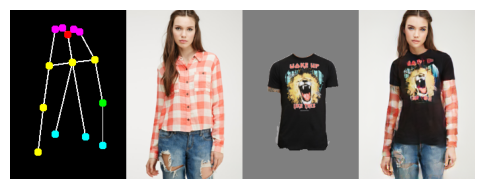

In [9]:
pid = ('plaid',3, 5)
ogids = [('print', 2, 5)]
# tuck in
pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid, ogids=ogids)
plot_img(pimg, gimgs, oimgs, gen_img, pose)

## Virual Try-On (Layering - Muliple)


/Users/sangtnguyen/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([18, 256, 176])


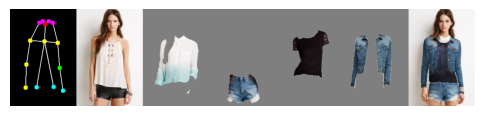

In [12]:
# person id
pid = ("fashionWOMENBlouses_Shirtsid0000637003_1front.jpg", None , None) # load person from the file

# garments to try on (ordered)
gids = [
    ("gfla",2,5),
    ("strip",3,1),
       ]

# garments to lay over (ordered)
ogids = [
 ("fashionWOMENTees_Tanksid0000159006_1front.jpg", None ,5),
 ('fashionWOMENJackets_Coatsid0000645302_1front.jpg', None ,3),
]

# dressing in order
pimg, gimgs, oimgs, gen_img, pose = dress_in_order(model, pid=pid, gids=gids, ogids=ogids)
plot_img(pimg, gimgs, oimgs, gen_img, pose)

## Opacity

(-0.5, 1231.5, 255.5, -0.5)

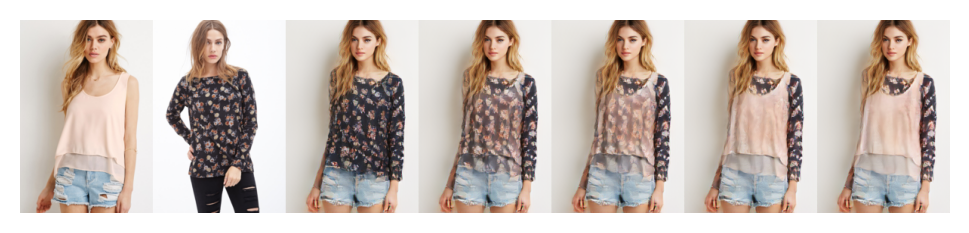

In [13]:

def dress_in_order_opcaity(model, pid, pose_id=None, gids=[], ogids=[], order=[5,1,3,2]):
    PID = [0,4,6,7]
    # encode person
    pimg, parse, from_pose = load_img(pid, ds)
    if not pose_id:
        to_pose = from_pose
    else:
        to_img, _, to_pose = load_img(pose_id, ds)
    psegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None], PID)

    # encode base garments
    gsegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None])

    # swap base garment if any
    gimgs = []
    for gid in gids:
        gimg, gparse, pose =  load_img(gid, ds)
        seg = model.encode_single_attr(gimg[None], gparse[None], pose[None], to_pose[None], i=gid[2])
        gsegs[gid[2]] = seg
        gimgs += [gimg]

    # encode garment (overlay)
    garments = []
    over_gsegs = []
    oimgs = []
    for gid in ogids:
        oimg, oparse, pose = load_img(gid, ds)
        oimgs.append(oimg)
        seg = model.encode_single_attr(oimg[None], oparse[None], pose[None], to_pose[None], i=gid[2])
        over_gsegs += [seg]

    gsegs = [gsegs[i] for i in order] + over_gsegs
    gen_img = model.netG(to_pose[None], psegs, gsegs)

    gmap, mask = gsegs[-1]
    gens = []
    for alpha in [0, 0.99, 0.6, 0.35, 0.25]:
        curr_mask = mask.clone() # * alpha
        curr_mask[curr_mask >= alpha] = alpha
        gsegs[-1] = gmap, curr_mask
        img = model.netG(to_pose[None], psegs, gsegs, alpha=0.1999)
        gens.append(img[0])
    return pimg, gimgs, oimgs, gens, to_pose

pid = ('fashionWOMENBlouses_Shirtsid0000270306_1front.jpg', None, 5)
gids = [('fashionWOMENTees_Tanksid0000255303_1front.jpg', None, 5)]
ogids = [('fashionWOMENBlouses_Shirtsid0000270306_1front.jpg', None, 5)]

pimg, gimgs, oimgs, gens, to_pose = dress_in_order_opcaity(model, pid=pid, gids=gids, ogids=ogids)

# plot results: (source person, source garment-inside, transparency results)
output = torch.cat([pimg, gimgs[0],gens[0]] + gens[::-1][:-1], 2)
output = (output + 1) / 2
output = output.float().cpu().detach().numpy()
output = np.transpose(output, [1,2,0])
fig=plt.figure(figsize=(6,4), dpi= 200, facecolor='w', edgecolor='k')
plt.imshow(output)
plt.axis('off')

## Reshaping


In [14]:

def dress_in_order_texshape(model, pid, target=5, shape_id=None, tex_patch=None, order=[2,5,1,3]):
    PID = [0,4,6,7]
    # encode person
    pimg, parse, from_pose = load_img(pid, ds)
    to_pose = from_pose
    psegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None], PID)

    # encode base garments
    gsegs = model.encode_attr(pimg[None], parse[None], from_pose[None], to_pose[None])

    fmap, mask = gsegs[target]
    gimg = pimg*(parse==target)
    if shape_id != None:
        gimg, gparse, pose =  load_img(shape_id, ds)
        _, mask = model.encode_single_attr(gimg[None], gparse[None], pose[None], to_pose[None], i=target)
        shape_img = [gimg*(gparse==target)]
    else:
        shape_img = []
    if tex_patch != None:
        fmap = model.netE_attr(tex_patch, model.netVGG)
    gsegs[target] = fmap, mask
    gsegs = [gsegs[i] for i in order]
    gen_img = model.netG(to_pose[None], psegs, gsegs)

    return pimg, [gimg], shape_img, gen_img[0], to_pose

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([18, 256, 176])


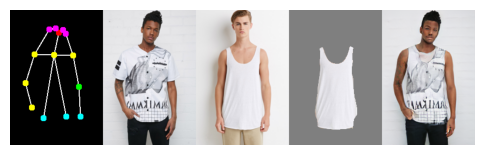

In [15]:
pid = ('print', 0, 5)
shape_id = ('plain', 2, 5)

pimg, gimgs, oimgs, gen_img, pose = dress_in_order_texshape(model, pid, shape_id=shape_id)
plot_img(pimg, gimgs, oimgs, gen_img, pose)

## Texture Transfer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([18, 256, 176])


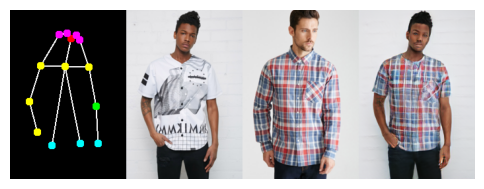

In [16]:

pid = ('print', 0, 5)
patch_id = ('plaid', 0, 5)
patch, parse, from_pose = load_img(patch_id, ds)
pimg, gimgs, oimgs, gen_img, pose = dress_in_order_texshape(model, pid, tex_patch=patch[None])
plot_img(pimg, [patch], oimgs, gen_img, pose)


## Print Insertion (RGBA image required)


In [17]:
# download from https://www.stickpng.com/img/memes/doge/doge-facing-right
import cv2
download_from_gdrive("data","doge.png","1ZjEZVWGyLX7Mefrkc03uaEsspP0Nk_EL",iszip=False)

fn = "data/doge.png"
pid = ('plain', 3, None)

image = cv2.imread(fn, cv2.IMREAD_UNCHANGED) #Read RGBA image
# put the print on a blank canvas
x,y,h,w = 90,60,80,70
image = cv2.resize(image, (w,h))
bg = np.zeros((256,176,4))
bg[x:x+h,y:y+w] = image
image = bg

# crop the print image
trans_mask = image[:,:,3] != 0
image = image[:,:,2::-1].transpose(2,0,1)
image = (image / 255.0) * 2 - 1
image = image * trans_mask[None]


# run DiOr
pimg, parse, to_pose =  load_img(pid, ds)
psegs = model.encode_attr(pimg[None], parse[None], to_pose[None], to_pose[None], [0,4,6,7])
gsegs = model.encode_attr(pimg[None], parse[None], to_pose[None], to_pose[None], [5,1,2])
# insert the print
print_image = torch.from_numpy(image).float().cuda()
print_fmap = model.netE_attr(print_image[None], model.netVGG)
print_mask = model.netE_attr.module.segmentor(print_fmap)
gsegs = gsegs[:1] + [(print_fmap, torch.sigmoid(print_mask))] + gsegs[1:]
# generate
gen_img = model.netG(to_pose[None], psegs, gsegs)

# construct a copy-and-paste image for comparison
paste_img = image + pimg.cpu().detach().numpy() * (1 - trans_mask[None])
paste_img = torch.from_numpy(paste_img).float().cuda()

# display
output = torch.cat([pimg, paste_img, gen_img[0]],2)
output = output.float().cpu().detach().numpy()
output = (output + 1) / 2
output = np.transpose((output * 255.0).astype(np.uint8), [1,2,0])
fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(output)
plt.axis('off')

NameError: name 'download_from_gdrive' is not defined